<a href="https://colab.research.google.com/github/jaguzman/FundamentosEnHerramientasDeTransformacionDigital/blob/master/Unidad%203%20-%20Aprendizaje%20de%20m%C3%A1quinas/2_Aprendizaje%20Supervisado/ArbolesDeDecisionYRandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ÁRBOLES DE DECISIÓN!

**Datos Bancarios de Comercialización**

Se cuenta con una base de datos de una campaña de comercialización de un banco portugués. Esta campaña se basó en llamadas telefónicas para ofrecer un producto al cliente y él se suscribía o no. El producto que se les ofreció fue un depósito a plazo.

Información del dataset: https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

[Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014

**OBJETIVO**

Crear un modelo de clasificación, basado en arboles de decisión, que prediga si un cliente se suscribirá a una campaña de comercialización (si/no).



**Contenido**

*   Base de datos
*   Descripción y analítica de datos
*   Preparación de los datos para el algoritmo
*   Árboles de Decisión
    - Clasificador
    - Actividad
*   Random Forest
    - Clasificador
*   Comparación de los clasificadores
*   Realizar una predicción

# **BASE DE DATOS**

In [22]:
import pandas as pd

# Leer los datos desde el GitHub
bank = pd.read_csv(
    "https://raw.githubusercontent.com/jaguzman/dataSets/master/datasets/bank.csv",
    sep = ',',         # Se especifica el separador de los datos
    thousands = None,  # Se especifica el separador de miles
    decimal = '.')     # Se especifica el separador de los decimales

# Imprimir el tamaño de la base de datos
print(bank.shape)
# Imprimir las primeras 7 líneas
bank.head(7)

(11162, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
5,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes
6,56,management,married,tertiary,no,830,yes,yes,unknown,6,may,1201,1,-1,0,unknown,yes


**DESCRIPCIÓN DE LA BASE DE DATOS**

**Datos bancarios del cliente**

**[1] Age:** edad  (numérico)

**[2] Job:** tipo de trabajo (categórico) [admin, technician, services, management, retired, blue-collar, unemployed, entrepreneur, housemaid, unknown, self-employed, student]

**[3] Marital:** estado civil (categórico) [married, single, divorced]

**[4] Education:** educación (categórica) [secondary, tertiary, primary, unknown] ['basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'analfabeto', 'professional.course', 'university.degree', 'unknown']

**[5] Default:** ¿tiene crédito en incumplimiento? (categórico) [yes, no]

**[6] Balance:** balance financiero de la persona (numérico)

**[7] Housing:** ¿tiene préstamo de vivienda? (categórico) [yes, no]

**[8] Loan:** ¿tiene préstamo personal? (categórico) [yes, no]

**Información relacionada con el último contacto con el cliente**

**[9] Contact:** medio de comunicación de contacto (categórico) [unknown, cellular, telephone]

**[10] Month:** mes del año del último contacto (categórico) [jan, feb, mar, apr, may, jun, jul, aug, sep, oct, nov, dec]

**[11] Day:** Día del mes del último contacto (numérico) [1-31]

**[12] Duration:** duración de la llamada del último contacto, en segundos (numérico)

**Otra información**

**[13] Campaing:** número de contactos realizados durante esta campaña (numérico)

**[14] Pdays:** número de días después de que el cliente fue contactado por última vez  (numérico) (999 significa que el cliente no ha sido contactado)

**[15] Previous:** número de contactos realizados antes de esta campaña (numérico)

**[16] Poutcome:**  resultado de la campaña de marketing anterior (categórico) [unknown, other, failure, success]

**Variable de salida**

**[17] deposit:** ¿El cliente se suscribió? (categórico) [yes, no]


In [23]:
# Información de la base de datos: nómbre de la columna, conteo de datos Null y tipo de datos
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


La base de datos no tiene datos nulos. En el caso de que existieran datos nulos se debe tomar alguna decisión, debido a que los algoritmos de aprendizaje de máquina no aceptan datos nulos. Algunas acciones son:

* Eliminar las filas que poseen los datos nulos.
* Eliminar la columna completa.
* Reemplazar los datos nulos por algún valor como la media, la mediana, la moda, valor cero, etc.

Todo dependerá del caso específico y es decisión del analista de datos.

# **DESCRIPCIÓN Y ANALÍTICA DE DATOS**

Graficar la cantidad de personas que se suscribieron y las que no.

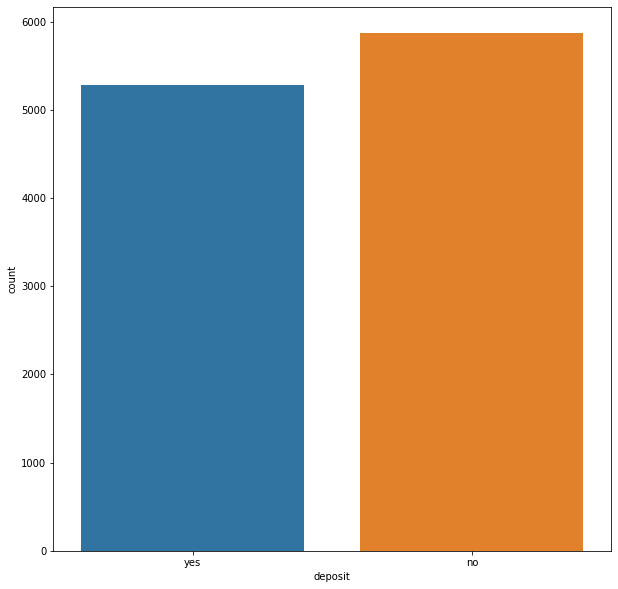

In [24]:
import seaborn as sns

# Esta función realiza una suma de cada categoría y luego las grafica 
sns.countplot(bank['deposit']) 

Otra gráfica para comparar la columna 'deposit'.

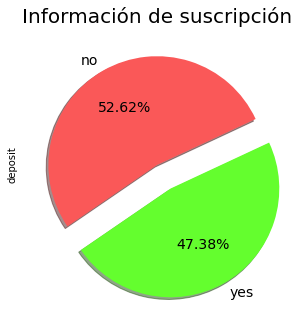

In [25]:
import matplotlib.pyplot as plt

# Tamaño de la imagen
plt.figure(figsize=(5,5)) 
# Título de la imagen
plt.title('Información de suscripción', fontsize=20) 
# Gráficar
bank["deposit"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', shadow=True, colors=["#FA5858", "#64FE2E"], fontsize=14, startangle=25)
# explode: separación entre las franjas de la gráfica
# autopct: valor numérico de cada porción
# shadow: sombras en las gráficas
# colors: colores de la gáfica
# fontsize: tamaño de la letra
# startangle: rotar la gráfica
# Consultra la librería para encontrar toda la infomación de los parámetros que se pueden modificar: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.pie.html

Se observa que la base de datos está balanceada, es decir, hay casi la misma cantidad de datos en la clase 'yes' que en la clase 'no'. 

Idealmente se espera que la base de datos tenga la misma cantidad de casos para las clases. Para cuando la base de datos está desbalanceada se puede:

* Trabajar el algoritmo de aprendizaje de máquinas con los datos existentes.
* Eliminar datos de la clase que posee más casos.
* Analizar la posibilidad de obtener más datos.
* En algunos casos se pueden implementar estrategias para aumentar los datos, por ejemplo, en procesamiento de imágenes, rotar la imagen.

Todo dependerá del contexto y del problema. Para este caso en particular se tomarán todos los datos.

A continuación, vamos a ver una gráfica de la distribución de los clientes con respecto a su edad.

Text(0.5, 1.0, 'Distribución de la edad de los clientes')

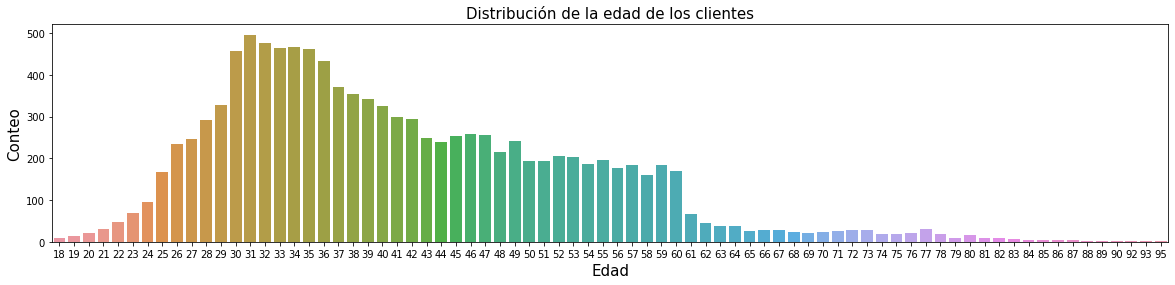

In [26]:
# crear las variables para la gráfica de la figura y los ejes
fig, ax = plt.subplots() 
# definir el tamaño de la gráfica
fig.set_size_inches(20, 4) 
# Columna de la base de datos que se graficará
sns.countplot(x='age', data = bank) 
# eje x
ax.set_xlabel('Edad', fontsize=15) 
# eje y
ax.set_ylabel('Conteo', fontsize=15) 
# título de la gráfica
ax.set_title('Distribución de la edad de los clientes', fontsize=15) 

Gráfica de la cantidad de personas por sus trabajos.

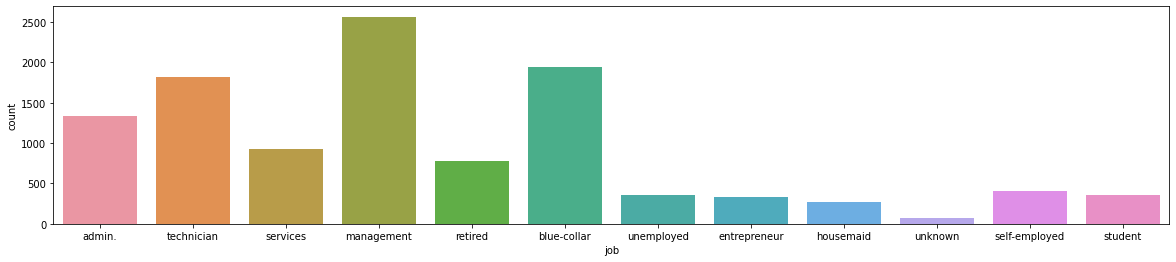

In [27]:
# Tamaño de la gráfica
plt.figure(figsize=(20,4))
# Suma y gráfica de los tipos de trabajo
sns.countplot(x='job', data = bank)

Graficar la relación entre los trabajos y la respuesta final del cliente.

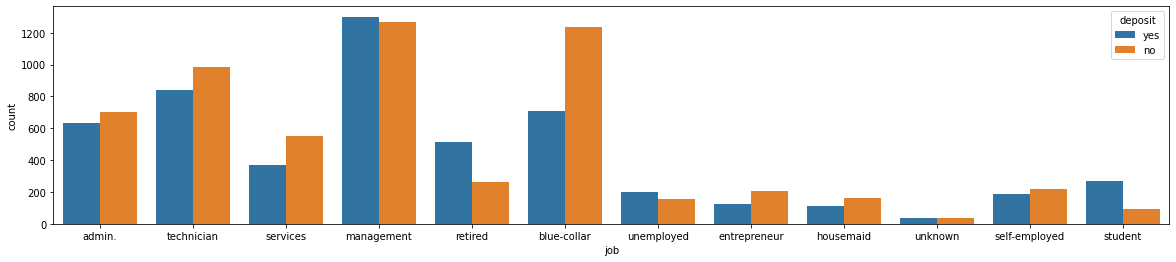

In [28]:
# Tamaño de la gráfica
plt.figure(figsize=(20,4))
# Suma y gráfica de los tipos de trabajo agrupados por la respuesta final del cliente
sns.countplot(x="job", hue="deposit", data=bank)

Graficar la relación entre el estado civil y la respuesta final del cliente.

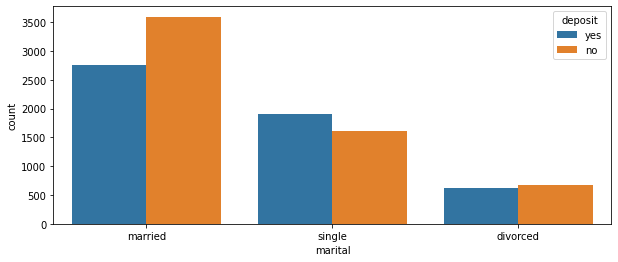

In [29]:
# Tamaño de la gráfica
plt.figure(figsize=(10,4))
# Suma y gráfica del estado civil y agrupados por la respuesta final del cliente
sns.countplot(x="marital", hue="deposit", data=bank)

Graficar la relación el nivel de escolaridad y la respuesta final del cliente.

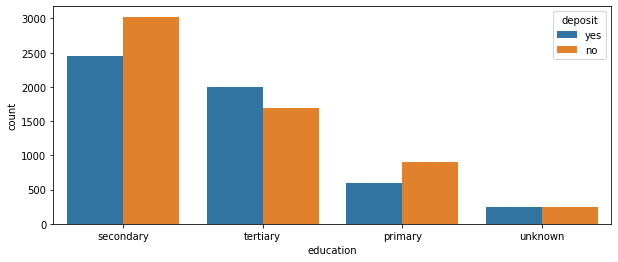

In [30]:
# Tamaño de la gráfica
plt.figure(figsize=(10,4))
# Suma y gráfica del nivel de escolaridad y agrupados por la respuesta final del cliente
sns.countplot(x="education", hue="deposit", data=bank)

Actividad: Graficar la relación entre si tiene crédito en incumplimiento ('default') y la respuesta final del cliente.

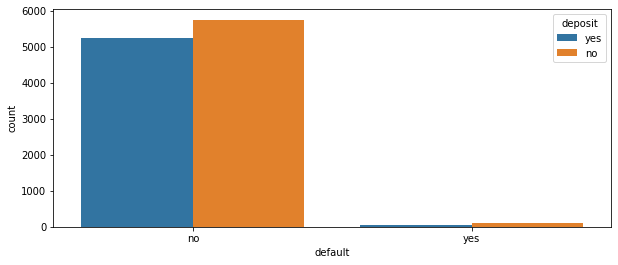

In [31]:
# Tamaño de la gráfica
plt.figure(figsize=(10,4))
# Suma y gráfica del incumplimiento y agrupados por la respuesta final del cliente
sns.countplot(x="default", hue="deposit", data=bank)

Actividad: Graficar la relación entre si tiene crédito de vivienda ('housing') y la respuesta final del cliente.

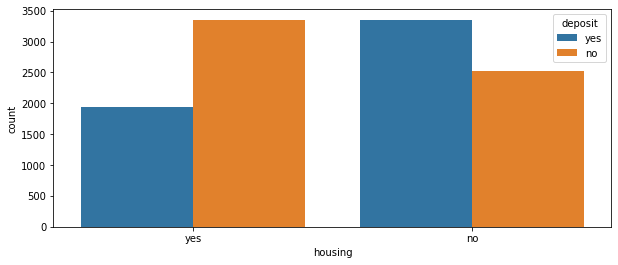

In [32]:
# Tamaño de la gráfica
plt.figure(figsize=(10,4))
# Suma y gráfica de si tiene crédito de vivienda y agrupados por la respuesta final del cliente
sns.countplot(x="housing", hue="deposit", data=bank)

Actividad: Graficar la relación entre si tiene crédito personal ('loan') y la respuesta final del cliente.

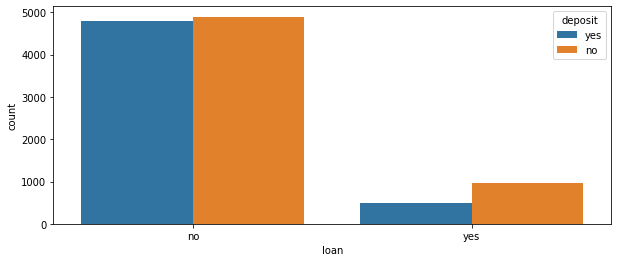

In [33]:
# Tamaño de la gráfica
plt.figure(figsize=(10,4))
# Suma y gráfica de si tiene crédito personal y agrupados por la respuesta final del cliente
sns.countplot(x="loan", hue="deposit", data=bank)

Ver la distribución de los datos de la las variables numéricas 'campaign', 'pdays', 'previous'.

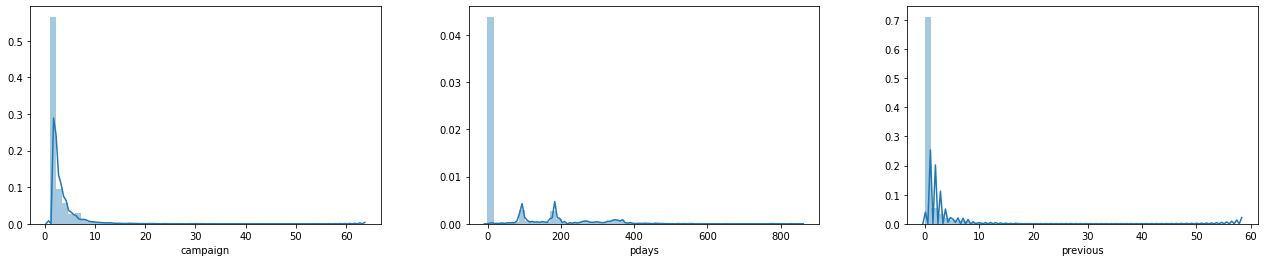

In [34]:
# Definición de figura con 3 gráficas de 1x3 y se define el tamaño de la figura
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (22,4))
# Gráfica 1: distribución de los valores de campaing
sns.distplot(bank.campaign, ax = ax1)
# Gráfica 2: distribución de los valores de pdays
sns.distplot(bank.pdays, ax = ax2)
# Gráfica 3: distribución de los valores de previous
sns.distplot(bank.previous, ax = ax3)
plt.subplots_adjust(wspace=0.25)

# **PREPARACIÓN DE LOS DATOS PARA EL ALGORITMO**

**Pasar de variables categórica a variable numéricas**

El algoritmo de árboles de decisión de python solo acepta variables numéricas, es decir que valores como Yes o No se deben convertir a números de alguna manera.

La función Encoder asigna un número a cada categoría (desde 0 hasta el número de categorías-1). De esta manera asignamos a cada valor categórico (Como Yes) un valor númerico (como 1)

In [35]:
from sklearn.preprocessing import LabelEncoder

# Definición de la función LabelEncoder
encoder = LabelEncoder()
# Realizar la conversión a todas las variables categoricas asignandóles un número iniciando desde 0
bank['deposit'] = encoder.fit_transform(bank['deposit'])
bank['job']      = encoder.fit_transform(bank['job']) 
bank['marital']  = encoder.fit_transform(bank['marital']) 
bank['education']= encoder.fit_transform(bank['education']) 
bank['default']  = encoder.fit_transform(bank['default']) 
bank['housing']  = encoder.fit_transform(bank['housing'])
bank['loan']  = encoder.fit_transform(bank['loan'])
bank['contact']  = encoder.fit_transform(bank['contact']) 
bank['month']  = encoder.fit_transform(bank['month'])
bank['poutcome']  = encoder.fit_transform(bank['poutcome'])
# Imprimir los primeros 5 datos de la base de datos 
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,2,0,0,1,1,0,0,20,0,257,1,-1,0,3,0
11158,39,7,1,1,0,733,0,0,2,16,6,83,4,-1,0,3,0
11159,32,9,2,1,0,29,0,0,0,19,1,156,2,-1,0,3,0
11160,43,9,1,1,0,0,0,1,0,8,8,9,2,172,5,0,0


pdays: Número de días que pasaron después de que el cliente fue contactado por última vez (numérico) (-1 significa que el cliente no fue contactado previamente). Entonces se mapea el valor -1 para un valor de muy alto, lo que significaría que es muy poco probable que el cliente haya sido contactado


In [36]:
# Reemplazar -1 por 10000
bank.loc[bank['pdays'] == -1, 'pdays'] = 1000

In [37]:
# descripción de todas las variables de la base de datos
bank.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,4.487905,1.199337,1.285164,0.015051,1528.538524,0.473123,0.130801,0.489697,15.658036,5.445709,371.993818,2.508421,797.820641,0.832557,2.477782,0.473840
std,11.913369,3.225132,0.625552,0.749478,0.121761,3225.413326,0.499299,0.337198,0.818724,8.420740,3.191939,347.128386,2.722077,351.708922,2.292007,1.002952,0.499338
min,18.000000,0.000000,0.000000,0.000000,0.000000,-6847.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,32.000000,1.000000,1.000000,1.000000,0.000000,122.000000,0.000000,0.000000,0.000000,8.000000,3.000000,138.000000,1.000000,521.000000,0.000000,2.000000,0.000000
50%,39.000000,4.000000,1.000000,1.000000,0.000000,550.000000,0.000000,0.000000,0.000000,15.000000,6.000000,255.000000,2.000000,1000.000000,0.000000,3.000000,0.000000
75%,49.000000,7.000000,2.000000,2.000000,0.000000,1708.000000,1.000000,0.000000,1.000000,22.000000,8.000000,496.000000,3.000000,1000.000000,1.000000,3.000000,1.000000
max,95.000000,11.000000,2.000000,3.000000,1.000000,81204.000000,1.000000,1.000000,2.000000,31.000000,11.000000,3881.000000,63.000000,1000.000000,58.000000,3.000000,1.000000


# **ÁRBOL DE DECISIÓN: CLASIFICADOR**

Se separa la base de datos entre datos de entrenamiento y datos de pruebas (80% - 20%)

In [38]:
from sklearn.model_selection import train_test_split

# Se toma la base de datos menos la variable de interes 'deposit'
x = bank.drop('deposit', 1)
# Se toma la variable de interés
y = bank.deposit
# Función que separa los datos datos de X y Y de entrenamiento y testeo
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 101)

print(x.shape)
print(x_train.shape)
print(x_test.shape)

(11162, 16)
(8929, 16)
(2233, 16)


In [39]:
from sklearn import tree

# Árbol de decisión de profundidad = 2
modelo1 = tree.DecisionTreeClassifier(max_depth=2)
# Entrenamiento del modelo
modelo1.fit(x_train, y_train)
# Cálculo de la exactitud media del proceso de entrenamiento
modelo1_score_train = modelo1.score(x_train, y_train)
# Imprimir el resultado
print("Exactitud en el entrenamiento: ",modelo1_score_train)
# Cálculo de la exactitud media del proceso de testeo
modelo1_score_test = modelo1.score(x_test, y_test)
# Imprimir el resultado
print("Exactitud en la prueba: ",modelo1_score_test)

Exactitud en el entrenamiento:  0.7603315040878038
Exactitud en la prueba:  0.7595163457232422


Graficar el árbol de decisión

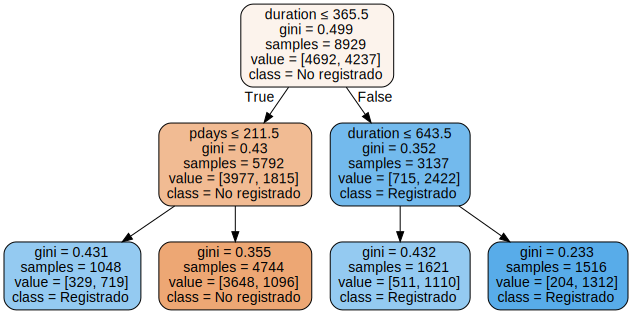

In [40]:
from matplotlib.pylab import rcParams
import graphviz

# Definición del nombre de las características
features_names = x.columns.tolist()
# Definición de la salida del sistema
classes_names = ['No registrado', 'Registrado']

# Configurar el tamaño de la gráfica
rcParams['figure.figsize'] = 10,10

Arbol = tree.export_graphviz(modelo1, out_file=None, 
                      feature_names=features_names,  
                      class_names=classes_names,  
                      filled=True, rounded=True,  
                      special_characters=True)  

graph = graphviz.Source(Arbol)  
graph

Como leer el Árbol de decisión

1. El nodo inicial pregunta si la duración de la llamada es menor o igual a 365.5.
2. Si es así (True), se mueve hacia abajo al nodo secundario izquierdo de la raíz (profundidad 1, izquierda).
3. Este nodo pregunta si la variable p_success es menor o igual a 0.5 (esta variable es 1 cuando el usuario se registró en la campaña anterior o 0 si el usuario no se registró en la campaña anterior).
4. Si es así (True), se mueve hacia abajo a la izquierda de la raíz (profundidad 2, izquierda). 'Concluyendo que la clase en No registrado'.
5. Si no es así (False), se mueve hacia abajo a la derecha de la raíz (profundidad 2, segundo nodo). 'Concluyendo que la clase en Registrado'.
6. Volviendo al nodo inicial, si la duración de la llamada es mayor a 365 debe moverse hacia el nodo secundario derecho de la raíz (profundidad 1, derecha)
7. Luego se pregunta: ¿el ancho del pétalo es menor que 1.75 cm? 
8. Todos los casos siguientes concluyen que la clase en 'Registrado'.






Atributos de los nodos

- Samples: de 8929 muestras (primer nodo), 5792 tienen duración menor o igual a 365.5 (nodo 2 izquierda) y 3137 muestras tiene mayor duración (nodo 2 derecha).
- Value: indica a cuántas instancias de entrenamiento de cada clase se aplica este nodo: por ejemplo, el primer nodo aplica 4692 a 0 No registrado y 4235 a 1 Registrado. 
- gini: (impureza). Un nodo es "puro" (gini = 0) si todas las instancias de entrenamiento a las que se aplica pertenecen a la misma clase. Para el primer nodo Gini igual a 1 - (4692/8929)^2 - (4235/8929)^2 ≈ 0.499.

Analizar cuáles son las características más importantes del modelo.

In [41]:
# Valor numérico de cada característica del árbol de decisión
fi = modelo1.feature_importances_
# Imprimir las características con su respectivo valor
l = len(features_names)
for i in range(0,len(features_names)):
    print('{:.<20} {:3}'.format(features_names[i],fi[i]))

age................. 0.0
job................. 0.0
marital............. 0.0
education........... 0.0
default............. 0.0
balance............. 0.0
housing............. 0.0
loan................ 0.0
contact............. 0.0
day................. 0.0
month............... 0.0
duration............ 0.7185406473281656
campaign............ 0.0
pdays............... 0.2814593526718343
previous............ 0.0
poutcome............ 0.0


**ACTIVIDAD**
1. Crear otro modelo de Árbol de Decisión con profundidad = 4.
2. Imprimir el modelo del Árbol de Decisión.
3. Crear otro modelo de Árbol de Decisión con profundidad máxima.
4. Imprimir las características más importantes.
5. Comparar todos los modelos y determinar cuál de ellos es el mejor.

**Solución 1. Árbol de Decisión profundidad = 4**

In [ ]:
# Árbol de Decisión de profundidad = 4
modelo2 = tree.DecisionTreeClassifier(max_depth=__)
# Entrenamiento del modelo
modelo2.fit(x_train, y_train)
# Cálculo de la exactitud media del proceso de entrenamiento
modelo2_score_train = modelo2.score(x_train, y_train)
# Imprimir el resultado
print("Exactitud en el entrenamiento: ",modelo2_score_train)
# Cálculo de la exactitud media del proceso de testeo
modelo2_score_test = modelo2.score(x_test, y_test)
# Imprimir el resultado
print("Exactitud en el testeo: ",modelo2_score_test)

Exactitud en el entrenamiento:  0.7812744988240564
Exactitud en el testeo:  0.7787729511867443


**Solución 2. Imprimir el Árbol de Decisión**

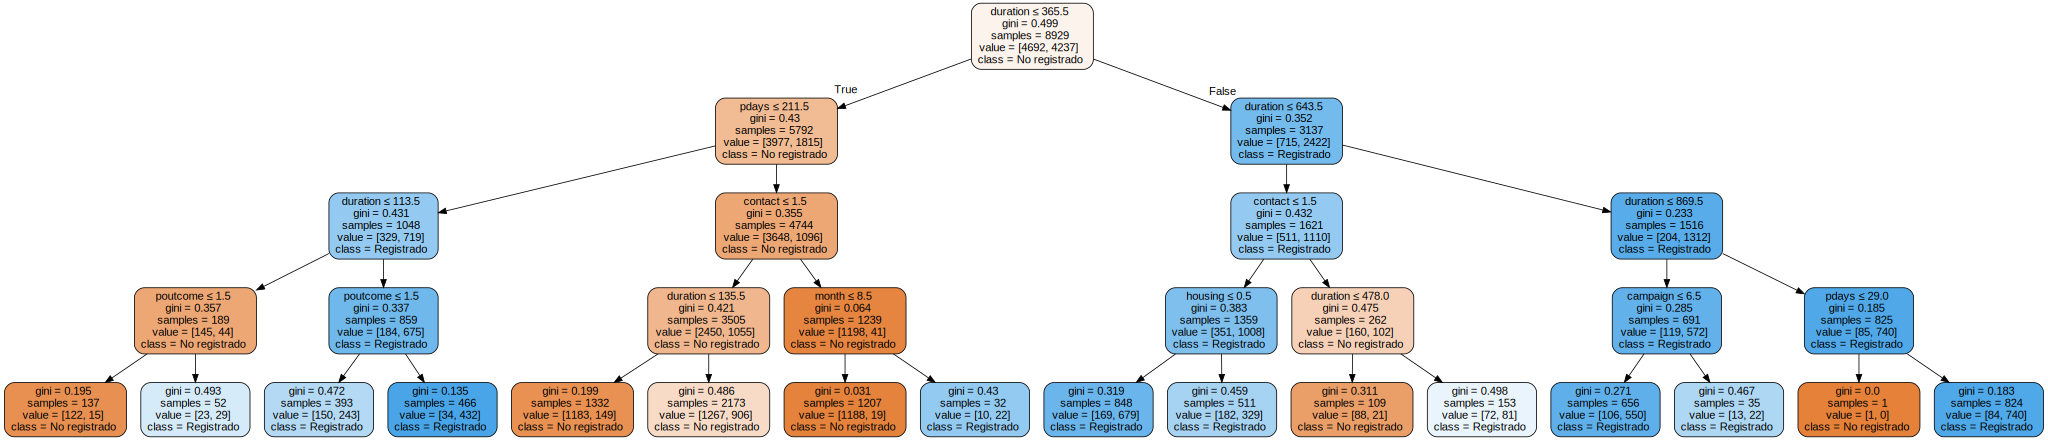

In [ ]:
# Se imprime el Árbol
Arbol = tree.export_graphviz(__, out_file=None, 
                      feature_names=features_names,  
                      class_names=classes_names,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(__) 
graph 

**Solución 3. Árbol de Decisión con profundidad máxima**

In [ ]:
# Árbol de Decisión de profundidad máxima
__ = tree.DecisionTreeClassifier()
# Entrenamiento del modelo
modelo3.fit(x_train, y_train)
# Cálculo de la exactitud media del proceso de entrenamiento
modelo3_score_train = modelo3.score(__, __)
# Imprimir el resultado
print("Exactitud en el entrenamiento: ",modelo3_score_train)
# Cálculo de la exactitud media del proceso de testeo
modelo3_score_test = modelo3.score(__, __)
# Imprimir el resultado
print("Exactitud en el testeo: ",modelo3_score_test)

Exactitud en el entrenamiento:  1.0
Exactitud en el testeo:  0.786833855799373


**Solución 4. Imprimir las características más importantes del modelo de máxima profundidad**

In [ ]:
# Valor numérico de cada característica del Árbol de Decisión
fi = modelo3.__
# Imprimir las características con su respectivo valor
l = len(features_names)
for i in range(0,len(features_names)):
    print('{:.<20} {:3}'.format(features_names[i],fi[i]))

age................. 0.0780531792322226
job................. 0.034649531750342105
marital............. 0.011962532127590068
education........... 0.014752214347756356
default............. 0.0003290848074771632
balance............. 0.07219507442790962
housing............. 0.02960085665901907
loan................ 0.005620977966825096
contact............. 0.04614466037686503
day................. 0.079926316931456
month............... 0.10406671483504895
duration............ 0.35107712922556195
campaign............ 0.031137816813052454
pdays............... 0.10852231857668171
previous............ 0.012990214208032157
poutcome............ 0.01897137771415971


**Solución 5. Comparar los modelos anteriores**

In [ ]:
# Comparación de los modelos exactitud

print('{:10} {:20} {:20}'.format('Profundidad', 'Desempeño entrenamiento','Desempeño prueba'))
print('{:10} {:20} {:20}'.format('-----------', '-----------------------','----------------'))
print('{:1} {:>26} {:>25}'.format(2, modelo_score_train, modelo1_score_test))
print('{:1} {:>28} {:>23}'.format(4, modelo_score_train, modelo_score_test))
print('{:1} {:>11} {:>37}'.format("max", modelo_score_train, modelo_score_test))

Profundidad Desempeño entrenamiento Desempeño prueba    
----------- ----------------------- ----------------    
2         0.7603315040878038        0.7595163457232422
4           0.7812744988240564      0.7787729511867443
max         1.0                     0.786833855799373


# **RANDOM FOREST: CLASIFICADOR**

In [42]:
# Se toma la base de datos menos la variable de interes 'deposit'
x = bank.drop('deposit', 1)
# Se toma la variable de interés
y = bank.deposit
# Función que separa los datos datos de X y Y de entrenamiento y testeo
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 101)

In [43]:
from sklearn.ensemble import RandomForestClassifier

# Ranom fores con 100 árboles
RFC_1 = RandomForestClassifier(n_estimators = 100)#criterion = entopy,gini
# Entrenamiento del modelo
RFC_1.fit(x_train, y_train)
# Cálculo de la exactitud media del proceso de testeo
modeloRFC_1_score_test = RFC_1.score(x_test, y_test)
# Imprimir el resultado
print("Exactitud en el testeo: ", modeloRFC_1_score_test)

Exactitud en el testeo:  0.851321092700403


Mostrar la relación de las características más importantes.

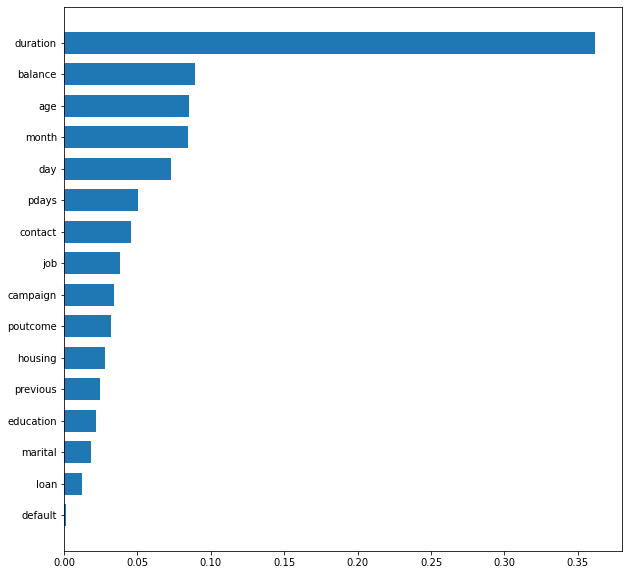

In [44]:
import numpy as np

tree_importance_sorted_idx = np.argsort(RFC_1.feature_importances_)
tree_indices = np.arange(0, len(RFC_1.feature_importances_)) + 0.5
# crear las variables para la gráfica de la figura y los ejes
fig, ax = plt.subplots() 
# definir el tamaño de la gráfica
fig.set_size_inches(10, 10) 
# Dato a graficar
plt.barh(tree_indices, RFC_1.feature_importances_[tree_importance_sorted_idx], height=0.7)
# eje y
ax.set_yticklabels( x_train.columns[tree_importance_sorted_idx])
ax.set_yticks(tree_indices)
# Imprimir la gráfica
plt.show()

Estas características fueron seleccionadas en un proceso de ajuste con 100 árboles de decisión. Así que se puede asumir que su orden es coherente. Realizar un análisis de características se puede, por ejemplo, filtrar características que no son relevantes para el modelo.

# **COMPARACIÓN DE LOS CLASIFICADORES**

La matriz de confusión es herramienta que permite visualizar el desempeño de los clasificadores.

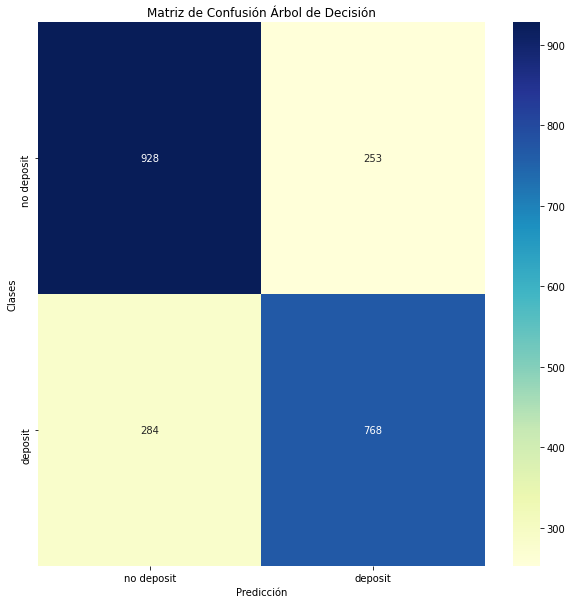

In [45]:
from sklearn.metrics import confusion_matrix

# Matriz de confusión para el modelo de Árbol de Decisión

# Predicción del modelo
y_pred = modelo1.predict(x_test)
# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
# Nombres de las clases
target_names = ['no deposit', 'deposit']
# Propiedades de la gráfica
ax= plt.subplot()
# Imprimir la matriz de confusión
sns.heatmap(cm, annot=True, fmt="d", ax = ax, cmap="YlGnBu"); #annot=True to annotate cells
# Nombre del eje x
ax.set_xlabel('Predicción');
# Nombre del eje y
ax.set_ylabel('Clases'); 
# Título de la gráfica
ax.set_title('Matriz de Confusión Árbol de Decisión'); 
# Nombres de las clases en eje x
ax.xaxis.set_ticklabels(target_names); 
# Nombres de las clases en eje y
ax.yaxis.set_ticklabels(target_names);

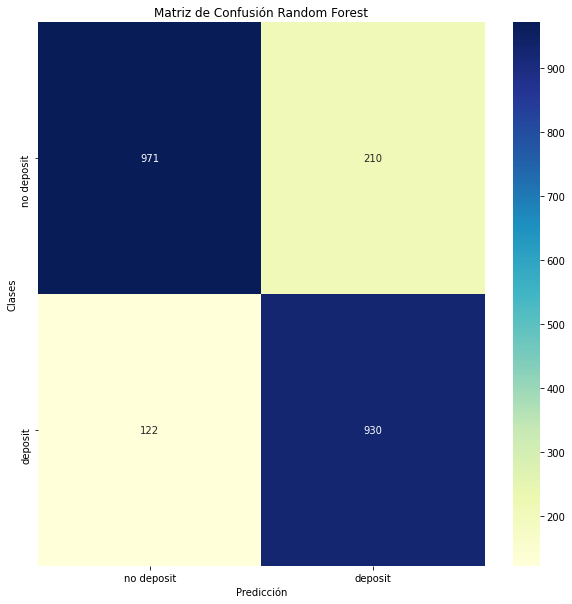

In [46]:
# Matriz de confusión para el modelo de Random Forest

# Predicción del modelo
y_pred = RFC_1.predict(x_test)
# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
# Nombres de las clases
target_names = ['no deposit', 'deposit']
# Propiedades de la gráfica
ax = plt.subplot()
# Imprimir la matriz de confusión
sns.heatmap(cm, annot=True, fmt="d", ax = ax, cmap="YlGnBu"); #annot=True to annotate cells
# Nombre del eje x
ax.set_xlabel('Predicción');
# Nombre del eje y
ax.set_ylabel('Clases'); 
# Título de la gráfica
ax.set_title('Matriz de Confusión Random Forest'); 
# Nombres de las clases en eje x
ax.xaxis.set_ticklabels(target_names); 
# Nombres de las clases en eje y
ax.yaxis.set_ticklabels(target_names);

# **REALIZAR UNA PREDICCIÓN**

Si se tiene un cliente nuevo con los siguientes datos:
*   age: 30
*   job: 9
* marital: 2
* education: 1
* default: 0
* balance: 2544
* housing:  0
* loan: 0
* contact: 0
* day: 8
* month: 0
* duration: 108
* campaign: 2
* pdays: 1000
* previous: 0
* poutcome: 3

¿El cliente se suscribirá? [Si: 1, No: 0]

In [47]:
# Se organiza el DataFrame
df = pd.DataFrame({'age':[30], 'job':[9], 'marital':[2], 'education':[1], 'default':[0], 'balance':[254], 'housing':[0], 'loan':[0], 'contact':[0], 'day':[8], 'month':[0], 'duration':[108], 'campaign':[2], 'pdays':[1000], 'previous':[0], 'poutcome':[3]})
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,30,9,2,1,0,254,0,0,0,8,0,108,2,1000,0,3


In [48]:
# Se realiza la predicción
prediction = RFC_1.predict(df)
# Se muestra la predicción
prediction

array([1])

El cliente, con las características dadas, **SI** se suscribirá a la campaña.